# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all,
    set_legend_right,
    plot

)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os
from sorcery import dict_of
import matplotlib.pyplot as plt


In [2]:
params = dict_of(
    data_dir = './gus_data',
    img_dir = './images',
    url =\
    'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip',
    zipfile = 'zgony_wg_tygodni.zip',
    file_prefix = 'Zgony wedêug tygodni w Polsce_',
    file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_',
    file_suffix = '.xlsx',
    libreoffice_cmd = 'libreoffice7.2',
    year_start = 2000,
    year_end = 2021
)


In [3]:
mygus = Analysis(params)

In [4]:
mygus.getdata()

Getting GUS data...
Unzipping file: zgony_wg_tygodni.zip
Converting *.xlsx to *.xls
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Making dictionary of year GUS data frames for each year: year_data_dict {int : pandas.DataFrame}
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Merging GUS data frames from dict in a single data frame: all_years_df
Saving GUS data frame for all years as ./gus_data/Zgony wedêug tygodni w Polsce_.csv
Done.


In [5]:
mygus.all_years_df

,Wiek zmarłych w latach,NUTS,Podregiony,T01,T02,T03,T04,T05,T06,T07,...,T45,T46,T47,T48,T49,T50,T51,T52,Rok,T53
0,Ogółem,PL,Polska,7913,8292,8970,9380,9474,8591,7841,...,6825,6873,7182,7173,7006,7296,7402,8000,2000,NaN
1,Ogółem,PL2,Makroregion Południowy,1629,1695,1805,1792,1754,1597,1520,...,1463,1380,1417,1444,1427,1533,1535,1603,2000,NaN
2,Ogółem,PL21,Małopolskie,616,636,676,675,665,649,548,...,584,513,555,546,531,601,593,617,2000,NaN
3,Ogółem,PL213,Miasto Kraków,139,162,156,167,162,154,135,...,148,103,134,126,137,131,140,149,2000,NaN
4,Ogółem,PL214,Krakowski,128,130,130,148,158,151,116,...,126,110,125,119,125,151,132,129,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43115,90 i więcej,PL922,Ciechanowski,15,17,11,14,16,14,17,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43116,90 i więcej,PL923,Płocki,18,11,9,17,14,11,14,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43117,90 i więcej,PL924,Ostrołęcki,21,25,27,19,15,17,16,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43118,90 i więcej,PL925,Siedlecki,11,17,18,18,19,17,21,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN


In [8]:
df = mygus.all_years_df

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (NUTS == "PL")'

df_og = df.query(Q).copy(deep=True)
df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
df_og = df_og.set_index('Rok').T.reset_index(drop=True)
df_og.index.name = 'Tydzień'

In [9]:
df_og

Rok,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Tydzień,,,,,,,,,,,,,,,,,,,,,
0,7913,7662,6889,8117,7568,7477,7504,7549,8160,8421,...,7557,9309,7533,7984,8215,9279,8372,8668,8463,11470
1,8292,7359,7053,7699,7741,7225,7298,7381,7773,8843,...,7442,9030,7317,7754,7920,10225,8078,8586,8242,10970
2,8970,7232,7286,7442,7648,7374,7425,7242,7851,8794,...,7655,9041,7261,7800,7683,9875,8639,8700,8059,11016
3,9380,7548,7027,7425,7555,7473,7964,7354,7657,9472,...,7368,8938,7463,7559,7977,9946,8793,8798,8015,10388
4,9474,7319,6771,7405,7802,7461,7639,7332,7437,9169,...,7728,8803,7713,7963,7970,10076,8987,9362,8560,9880
5,8591,7469,6844,7613,7972,7688,7403,7636,7588,9141,...,8133,8401,7837,8166,8145,9432,9088,9269,8343,9925
6,7841,7078,6694,7658,7272,7937,7327,7501,7576,8509,...,8258,8159,7584,8873,7928,9221,9128,9241,8624,10116
7,7532,6972,6983,7972,7246,7798,7122,7923,7678,8191,...,7699,7839,7524,8985,7861,9053,9333,8717,8474,9894
8,7526,7303,6879,8276,7260,8057,7079,8323,7862,7869,...,7515,7788,7627,9068,8002,8388,9864,8620,8471,10155


KeyError: '[2020, 2021] not in index'

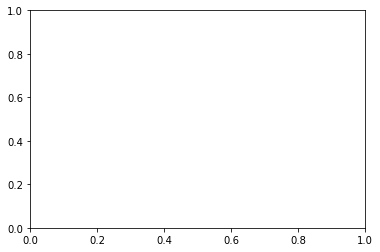

In [17]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all,
#     set_legend_right,
#     plot
# )



plotopts = dict_of(
    plotdf=df_og, 
    cols_to_plot = [2019,2020,2021], 
    ylabel = 'Zgony',
    title = 'Zgony, Polska ogółem',
    fontsize = 8
    )

plot(**plotopts);

In [9]:
# df = mygus.all_years_df

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Lubelskie")'
# dfl=dict()
# dfl["Lubelskie"] = (df.query(Q).copy(deep=True))
# dfl["Lubelskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Lubelskie"] = dfl["Lubelskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Lubelskie"].index.name = 'Tydzień'

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Podlaskie")'

# dfl["Podlaskie"] = (df.query(Q).copy(deep=True))
# dfl["Podlaskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Podlaskie"] = dfl["Podlaskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Podlaskie"].index.name = 'Tydzień'

# plotopts = dict_of(
#     plotdf=[dfl["Lubelskie"],dfl["Podlaskie"]], 
#     cols_to_plot = [2019,2020,2021], 
#     ylabel = 'Zgony',
#     title = 'Zgony, Lubelskie',
#     fontsize = 8
#     )

# plot(**plotopts);

In [10]:
# dfl.values()